In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import StandardScaler
# Load the dataset
final_df = pd.read_csv('updated_analytics_dataset.csv')

# Display the first few rows of the dataset to inspect it
final_df.head()


,Transaction_ID,Product_ID,Customer_ID,Timestamp,Quantity,Price,Category,Stock_Level,Reorder_Point,Supplier,Name,Age,Gender,Region,Total_Spend,Revenue
0,T000001,P0301,C0762,10/7/2024 2:56,7.0,62.61,Electronics,488,31,"Mejia, Clark and Allen",Jason Nichols,43.0,Male,South,3323.45,14.303816
1,T000002,P0444,C0014,8/16/2024 20:16,8.0,57.92,Electronics,235,24,"Mejia, Clark and Allen",Colton Beck,31.0,Female,South,8138.84,14.560366
2,T000003,P0222,C0964,10/1/2024 4:04,7.0,79.89,Electronics,329,21,Taylor Ltd,Melanie Wiggins,61.0,Male,North,5867.07,15.453907
3,T000004,P0324,C0373,1/31/2024 10:56,NaN,72.42,Groceries,198,37,Stanton LLC,Thomas Quinn,61.0,Male,West,4457.69,16.213261
4,T000005,P0196,C0673,10/14/2024 8:32,2.0,45.34,Groceries,221,42,Hamilton Group,Leslie Wong,46.0,Female,East,5907.18,NaN


In [2]:
final_df.describe()

,Quantity,Price,Stock_Level,Reorder_Point,Age,Total_Spend,Revenue
count,9698.000000,9695.000000,10200.000000,10200.000000,9693.000000,10200.000000,9692.000000
mean,5.150315,53.822774,258.473431,34.538235,44.100350,5094.593770,11.150080
std,2.872477,30.760004,146.315245,8.469952,16.698718,2744.850278,3.519701
min,1.000000,5.000000,0.000000,20.000000,18.000000,121.220000,1.999321
25%,3.000000,28.590000,138.000000,28.000000,31.000000,2866.160000,8.418077
50%,5.000000,52.990000,256.000000,34.000000,43.000000,4985.340000,11.194586
75%,7.000000,77.095000,397.000000,42.000000,56.000000,7395.790000,13.813473
max,17.868830,190.165019,499.000000,49.000000,117.938203,9987.500000,19.951940


In [3]:
# Check the shape of the dataset
print(f"Dataset shape: {final_df.shape}")

# Check the data types of each column
print(final_df.dtypes)

# Check for missing values
print(final_df.isnull().sum())


Dataset shape: (10200, 16)
Transaction_ID     object
Product_ID         object
Customer_ID        object
Timestamp          object
Quantity          float64
Price             float64
Category           object
Stock_Level         int64
Reorder_Point       int64
Supplier           object
Name               object
Age               float64
Gender             object
Region             object
Total_Spend       float64
Revenue           float64
dtype: object
Transaction_ID      0
Product_ID          0
Customer_ID         0
Timestamp           0
Quantity          502
Price             505
Category            0
Stock_Level         0
Reorder_Point       0
Supplier            0
Name                0
Age               507
Gender            509
Region              0
Total_Spend         0
Revenue           508
dtype: int64


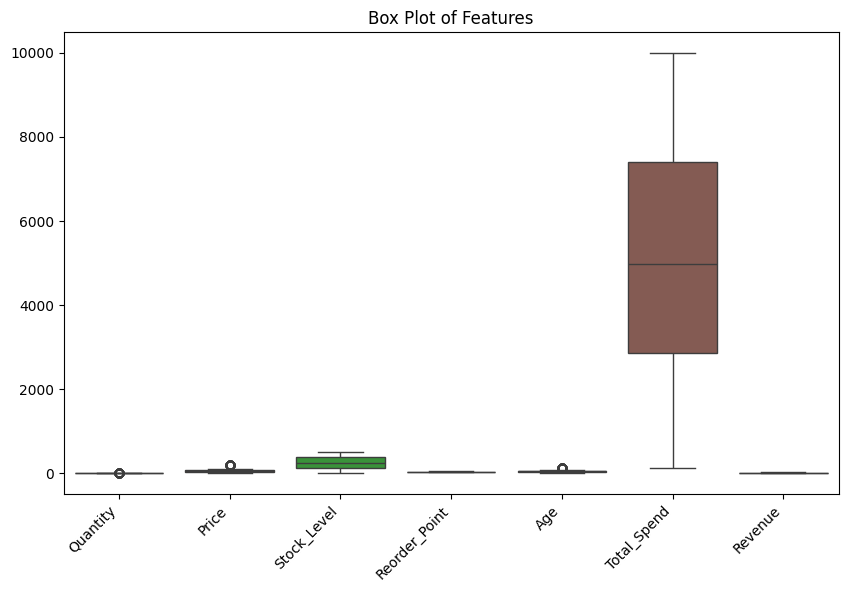

In [4]:

# Create the box plot without
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_df)
plt.title('Box Plot of Features')
plt.xticks(rotation=45, ha='right')
plt.show()

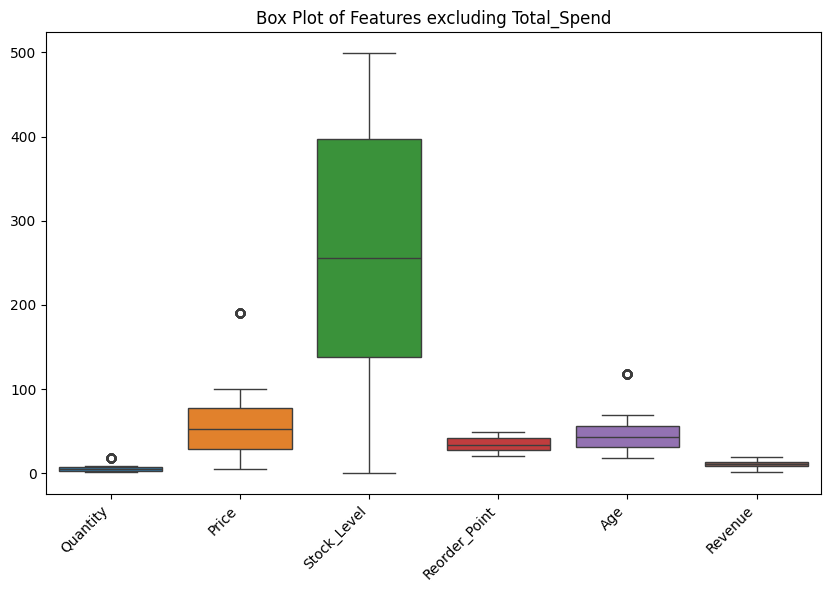

In [5]:

# Create the box plot without 'Total_Spend'
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_df.drop('Total_Spend',axis=1))
plt.title('Box Plot of Features excluding Total_Spend')
plt.xticks(rotation=45, ha='right')
plt.show()

In [6]:
# Check missing values before
print("Missing Values Before:\n", final_df.isnull().sum())

# Separate numerical and categorical columns
num_cols = final_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = final_df.select_dtypes(include=['object']).columns

# Impute missing values
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

final_df[num_cols] = num_imputer.fit_transform(final_df[num_cols])
final_df[cat_cols] = cat_imputer.fit_transform(final_df[cat_cols])

# Check missing values after
print("Missing Values After:\n", final_df.isnull().sum())


Missing Values Before:
 Transaction_ID      0
Product_ID          0
Customer_ID         0
Timestamp           0
Quantity          502
Price             505
Category            0
Stock_Level         0
Reorder_Point       0
Supplier            0
Name                0
Age               507
Gender            509
Region              0
Total_Spend         0
Revenue           508
dtype: int64
Missing Values After:
 Transaction_ID    0
Product_ID        0
Customer_ID       0
Timestamp         0
Quantity          0
Price             0
Category          0
Stock_Level       0
Reorder_Point     0
Supplier          0
Name              0
Age               0
Gender            0
Region            0
Total_Spend       0
Revenue           0
dtype: int64


In [7]:
# Check for duplicate rows
print("Duplicate Rows Before:", final_df.duplicated().sum())

# Drop duplicates
final_df.drop_duplicates(inplace=True)

# Check duplicates after
print("Duplicate Rows After:", final_df.duplicated().sum())


Duplicate Rows Before: 13
Duplicate Rows After: 0


In [8]:
def outliers_func(column):
    # Calculate the IQR for the column
    Q1 = final_df[column].quantile(0.25)
    Q3 = final_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = final_df[(final_df[column] < lower_bound) | (final_df[column] > upper_bound)]

    # Calculate the mean of column, excluding outliers
    mean_open_price_no_outliers = final_df[(final_df[column] >= lower_bound) & (final_df[column] <= upper_bound)][column].mean()

    # Fill outliers with the mean (excluding outliers)
    final_df.loc[(final_df[column] < lower_bound) | (final_df[column] > upper_bound), column] = mean_open_price_no_outliers

In [9]:
cols = ['Quantity', 'Price','Stock_Level','Age','Total_Spend']
for col in cols:
    outliers_func(col)


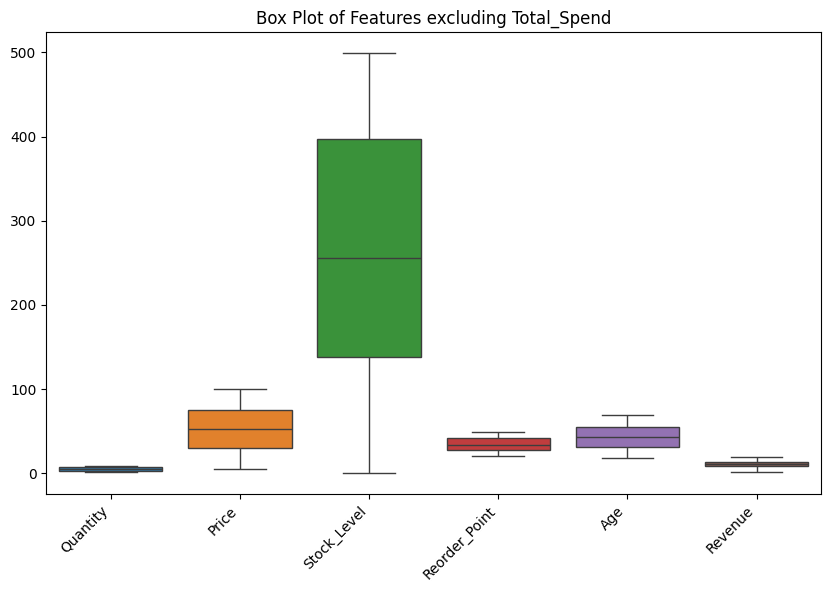

In [10]:

# Create the box plot without 'Total_Spend'
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_df.drop('Total_Spend',axis=1))
plt.title('Box Plot of Features excluding Total_Spend')
plt.xticks(rotation=45, ha='right')
plt.show()

In [11]:
# Convert 'Timestamp' to datetime
final_df['Timestamp'] = pd.to_datetime(final_df['Timestamp'])

# Check data types again to confirm
final_df.dtypes


,0
Transaction_ID,object
Product_ID,object
Customer_ID,object
Timestamp,datetime64[ns]
Quantity,float64
Price,float64
Category,object
Stock_Level,float64
Reorder_Point,float64
Supplier,object


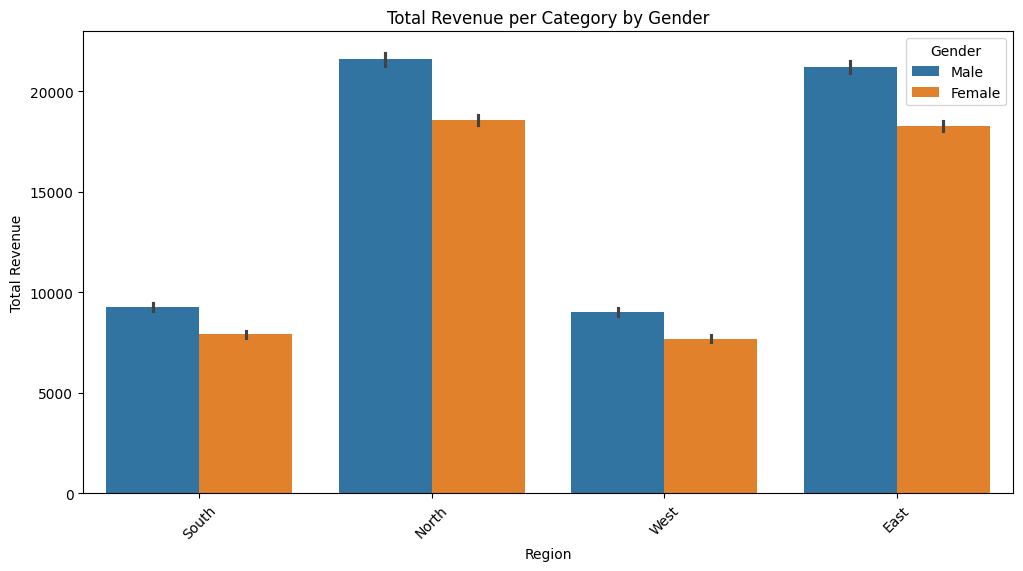

In [12]:


plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Revenue', hue='Gender', data=final_df, estimator=sum)
plt.title('Total Revenue per Category by Gender')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

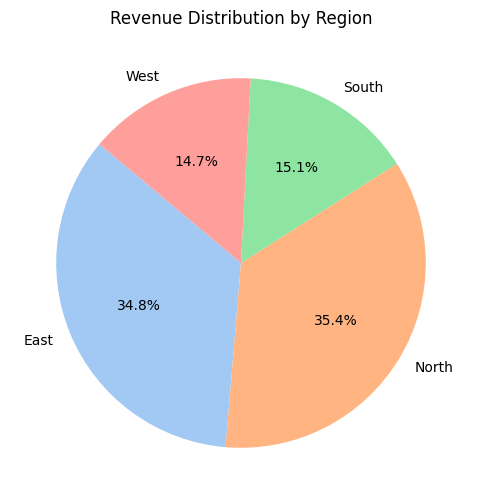

In [13]:
# Calculate total revenue by region
region_revenue = final_df.groupby('Region')['Revenue'].sum().reset_index()

# Plot revenue distribution by region as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    region_revenue['Revenue'],
    labels=region_revenue['Region'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)
plt.title("Revenue Distribution by Region")
plt.show()


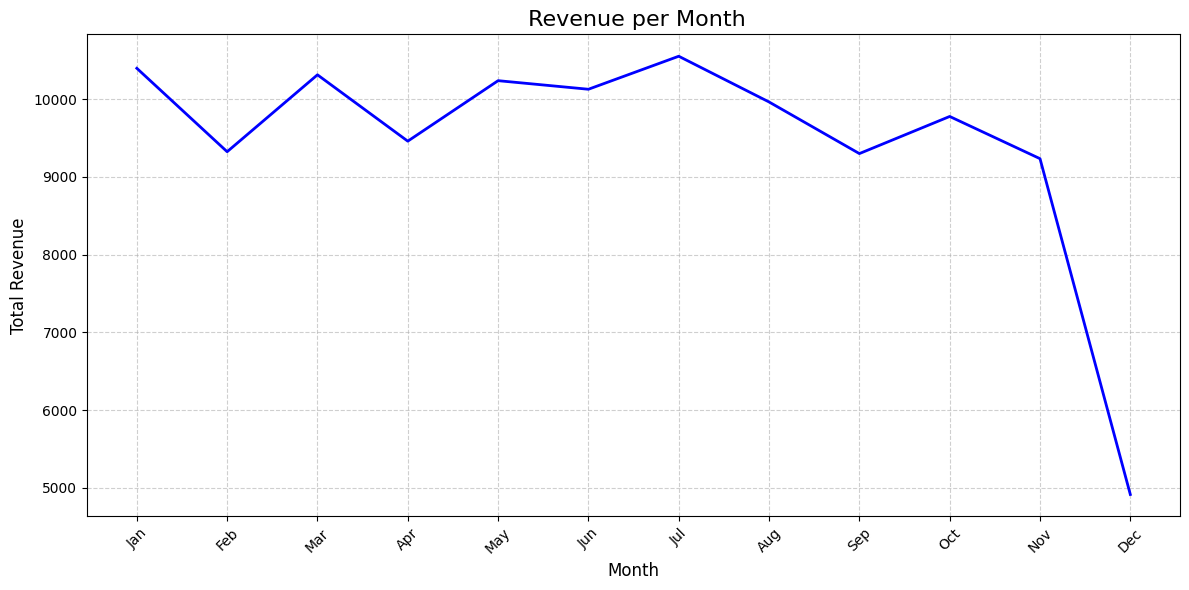

In [14]:
# Step 1: Ensure 'Revenue' does not have negative values
final_df['Revenue'] = final_df['Revenue']  # Set negative values to 0


# Step 4: Aggregate revenue by month
monthly_revenue = final_df.groupby(final_df['Timestamp'].dt.month)['Revenue'].sum().reset_index()
monthly_revenue.columns = ['Month', 'Total_Revenue']

# Step 5: Plot the time series of monthly revenue
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='Month', y='Total_Revenue', color='blue', linewidth=2)
plt.title(" Revenue per Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()


In [15]:
final_df.head()

,Transaction_ID,Product_ID,Customer_ID,Timestamp,Quantity,Price,Category,Stock_Level,Reorder_Point,Supplier,Name,Age,Gender,Region,Total_Spend,Revenue
0,T000001,P0301,C0762,2024-10-07 02:56:00,7.0,62.61,Electronics,488.0,31.0,"Mejia, Clark and Allen",Jason Nichols,43.0,Male,South,3323.45,14.303816
1,T000002,P0444,C0014,2024-08-16 20:16:00,8.0,57.92,Electronics,235.0,24.0,"Mejia, Clark and Allen",Colton Beck,31.0,Female,South,8138.84,14.560366
2,T000003,P0222,C0964,2024-10-01 04:04:00,7.0,79.89,Electronics,329.0,21.0,Taylor Ltd,Melanie Wiggins,61.0,Male,North,5867.07,15.453907
3,T000004,P0324,C0373,2024-01-31 10:56:00,5.0,72.42,Groceries,198.0,37.0,Stanton LLC,Thomas Quinn,61.0,Male,West,4457.69,16.213261
4,T000005,P0196,C0673,2024-10-14 08:32:00,2.0,45.34,Groceries,221.0,42.0,Hamilton Group,Leslie Wong,46.0,Female,East,5907.18,11.194586


In [17]:
scaler = StandardScaler()
final_df[num_cols] = scaler.fit_transform(final_df[num_cols])

In [18]:
label_encoders = {}
for column in cat_cols:
    le = LabelEncoder()
    final_df[column] = le.fit_transform(final_df[column])
    label_encoders[column] = le

In [19]:
final_df.head()

,Transaction_ID,Product_ID,Customer_ID,Timestamp,Quantity,Price,Category,Stock_Level,Reorder_Point,Supplier,Name,Age,Gender,Region,Total_Spend,Revenue
0,0,300,761,7977,0.794979,0.381993,1,1.568661,-0.418058,11,387,-0.020494,1,2,-0.645198,0.918659
1,1,443,13,6609,1.195667,0.206408,1,-0.160479,-1.244564,11,200,-0.848864,0,2,1.109226,0.993424
2,2,221,963,7835,0.794979,1.028924,1,0.481968,-1.598781,18,650,1.222062,1,1,0.281537,1.253825
3,3,323,372,898,-0.006396,0.749261,2,-0.413357,0.290377,17,920,1.222062,1,3,-0.231953,1.475120
4,4,195,672,8195,-1.208459,-0.264564,2,-0.256162,0.880739,3,571,0.186599,0,0,0.296150,0.012549


In [ ]:

# Save the DataFrame to an Excel file
from google.colab import files
final_df.to_excel('updated_analytics_dataset.xlsx', index=False)

# Download the Excel file
files.download('updated_analytics_dataset.xlsx')